In [1]:
from utils.alad import ALAD
from utils.dataloader import Dataloader
import torch
from torchvision.utils import make_grid
from matplotlib import pyplot as plt
import numpy as np

# Train ALAD model on tabular dataset KDDCup99

In [2]:
# Define training parameters according to Paper ones.
batch_size = 50
dataset = 'KDDCup'
network_name = 'KDD'
max_epochs = 100

In [3]:
alad = ALAD(
    dataset,
    batch_size,
    network_name,
    device="cuda",
    optimizer=torch.optim.Adam,
    max_epochs=max_epochs,
    verbose=False,
    report_interval=10,
    checkpoint_interval=500
)

Load tabular data KDDCup99...
Proportion of as anomalous defined samples in test set: 19.82% (In Total: 19583 of 98804 samples)


In [4]:
# Train model
alad.train()

----------------------------------------------------------------------------------------------------
----------------------------- Start training with dataset KDDCup99 -----------------------------
----------------------------------------------------------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:02<00:00, 38.48it/s]


Number of anomalous samples: 19583


100%|██████████| 1977/1977 [00:01<00:00, 1265.95it/s]


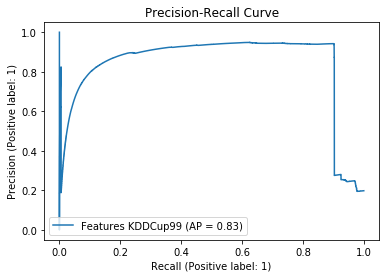

Precision: 0.9481 	 Recall: 0.9417 	 F1-Score: 0.9449


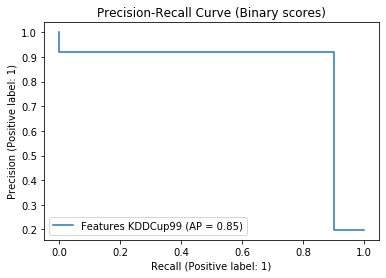

In [5]:
# Evaluate model
alad.evaluate()

# Train ALAD model on image dataset CIFAR-10

In [2]:
# Define training parameters according to Paper ones.
batch_size = 32
dataset = 'CIFAR10'
network_name = 'logo'
max_epochs = 100

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Load image data CIFAR-10 of class 0...
Files already downloaded and verified
After discarding anomalous classes (except normal class 0), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)


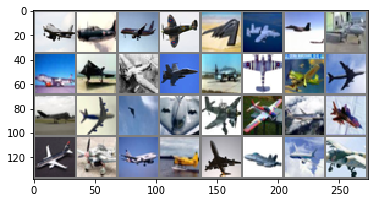

In [4]:
# Show dataset
train_loader, _, _, _ = Dataloader(dataset)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# get first training batch
dataiter = iter(train_loader)
imgs, _ = dataiter.next()

imshow(make_grid(imgs))

In [5]:
alad = ALAD(
dataset,
batch_size,
network_name,
device="cuda",
optimizer=torch.optim.Adam,
max_epochs=max_epochs,
verbose=False,
report_interval=10,
checkpoint_interval=500)

Load image data CIFAR-10 of class 0...
Files already downloaded and verified
After discarding anomalous classes (except normal class 0), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)
Load image data CIFAR-10 of class 1...
Files already downloaded and verified
After discarding anomalous classes (except normal class 1), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)
Load image data CIFAR-10 of class 2...
Files already downloaded and verified
After discarding anomalous classes (except normal class 2), 5000 of 50000 images (10.0%) remain for training.
Files already downloaded and verified
Proportion of as anomalous defined samples in test set: 90.0% (In Total: 9000 of 10000 samples)
Load image data CIFAR-10 of class 3..

In [6]:
# Train model
alad.train()

----------------------------------------------------------------------------------------------------
------------------------ Start training with class plane as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:29<00:00, 15.89s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class car as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:31<00:00, 15.92s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class bird as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:31<00:00, 15.92s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class cat as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:31<00:00, 15.92s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class deer as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:31<00:00, 15.92s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class dog as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:31<00:00, 15.92s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class frog as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:31<00:00, 15.92s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class horse as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:31<00:00, 15.92s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class ship as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:33<00:00, 15.93s/it]


----------------------------------------------------------------------------------------------------
------------------------ Start training with class truck as normal class ------------------------
----------------------------------------------------------------------------------------------------


100%|██████████| 100/100 [26:32<00:00, 15.92s/it]


Start evaluation...
Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.67it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.46it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.71it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.75it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.74it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.85it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.79it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.82it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.79it/s]


Number of anomalous samples: 9000


100%|██████████| 313/313 [00:04<00:00, 71.33it/s]


ROC AUC score of class plane: 68.68
ROC AUC score of class car: 49.47
ROC AUC score of class bird: 65.65
ROC AUC score of class cat: 56.73
ROC AUC score of class deer: 69.25
ROC AUC score of class dog: 57.68
ROC AUC score of class frog: 76.72
ROC AUC score of class horse: 54.86
ROC AUC score of class ship: 78.16
ROC AUC score of class truck: 43.70


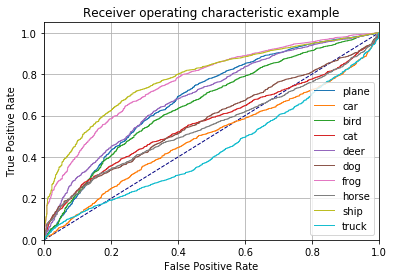

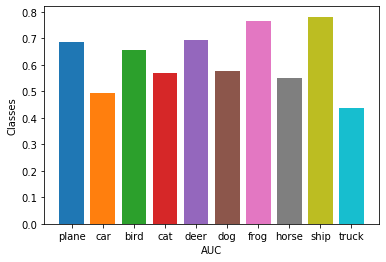

In [7]:
# Evaluate model
alad.evaluate()